In [13]:
library(tidyverse)
library(readxl)

**reading in contraceptives data**

In [22]:
contraceptives <- read_excel("data/contraceptives.xlsx", sheet = 3, range = "A10:AM1377", 
                             col_names = c("country", "ISO_code", "survey_start_year", "survey_end_year", "age_group", 
                                          "any_method", "any_method_modern", "female_sterilization", "male_sterilization", "IUD", "implant", "injectible", 
                                           "pill", "male_condom", "female_condom", "vaginal_barrier", "LAM", "emergency", "other_methods", "any_traditional", 
                                           "rhythm", "withdrawal", "other_traditional", "unmet_total", "unmet_spacing", "unmet_limiting", "data_source", "data_id",
                                          "data_longname", "data_shortname", "notes_country", "notes_data", "notes_population", "notes_contraceptive_methods", "notes_contraceptive_residuals_modern",
                                          "notes_contraceptive_residuals_traditional", "notes_unmet_population_included", "notes_population_excluded", "notes_unmet_indicator"))

contraceptives_by_country <- contraceptives %>% 
                                select(country, survey_end_year, age_group, any_method)

**reading in olympics data**

In [21]:
olympics <- read_csv("data/athlete_events.csv")

olympics_female <- olympics %>%
            filter(Sex == "F") %>%
            filter(Year >= 1950) %>%
            select(-ID, -Name, -Sex, -Height, -Weight, -NOC, -Games, -City)

olympics_by_country <- olympics_female %>%
                        group_by(Team, Year) %>%
                        summarise(n = n())

Parsed with column specification:
cols(
  ID = col_double(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  Height = col_double(),
  Weight = col_double(),
  Team = col_character(),
  NOC = col_character(),
  Games = col_character(),
  Year = col_double(),
  Season = col_character(),
  City = col_character(),
  Sport = col_character(),
  Event = col_character(),
  Medal = col_character()
)

`summarise()` regrouping output by 'Team' (override with `.groups` argument)



**joining, filtering, and plotting contraceptive prevalence vs. #female olympians**

Warning message:
“Removed 1050 rows containing missing values (geom_point).”


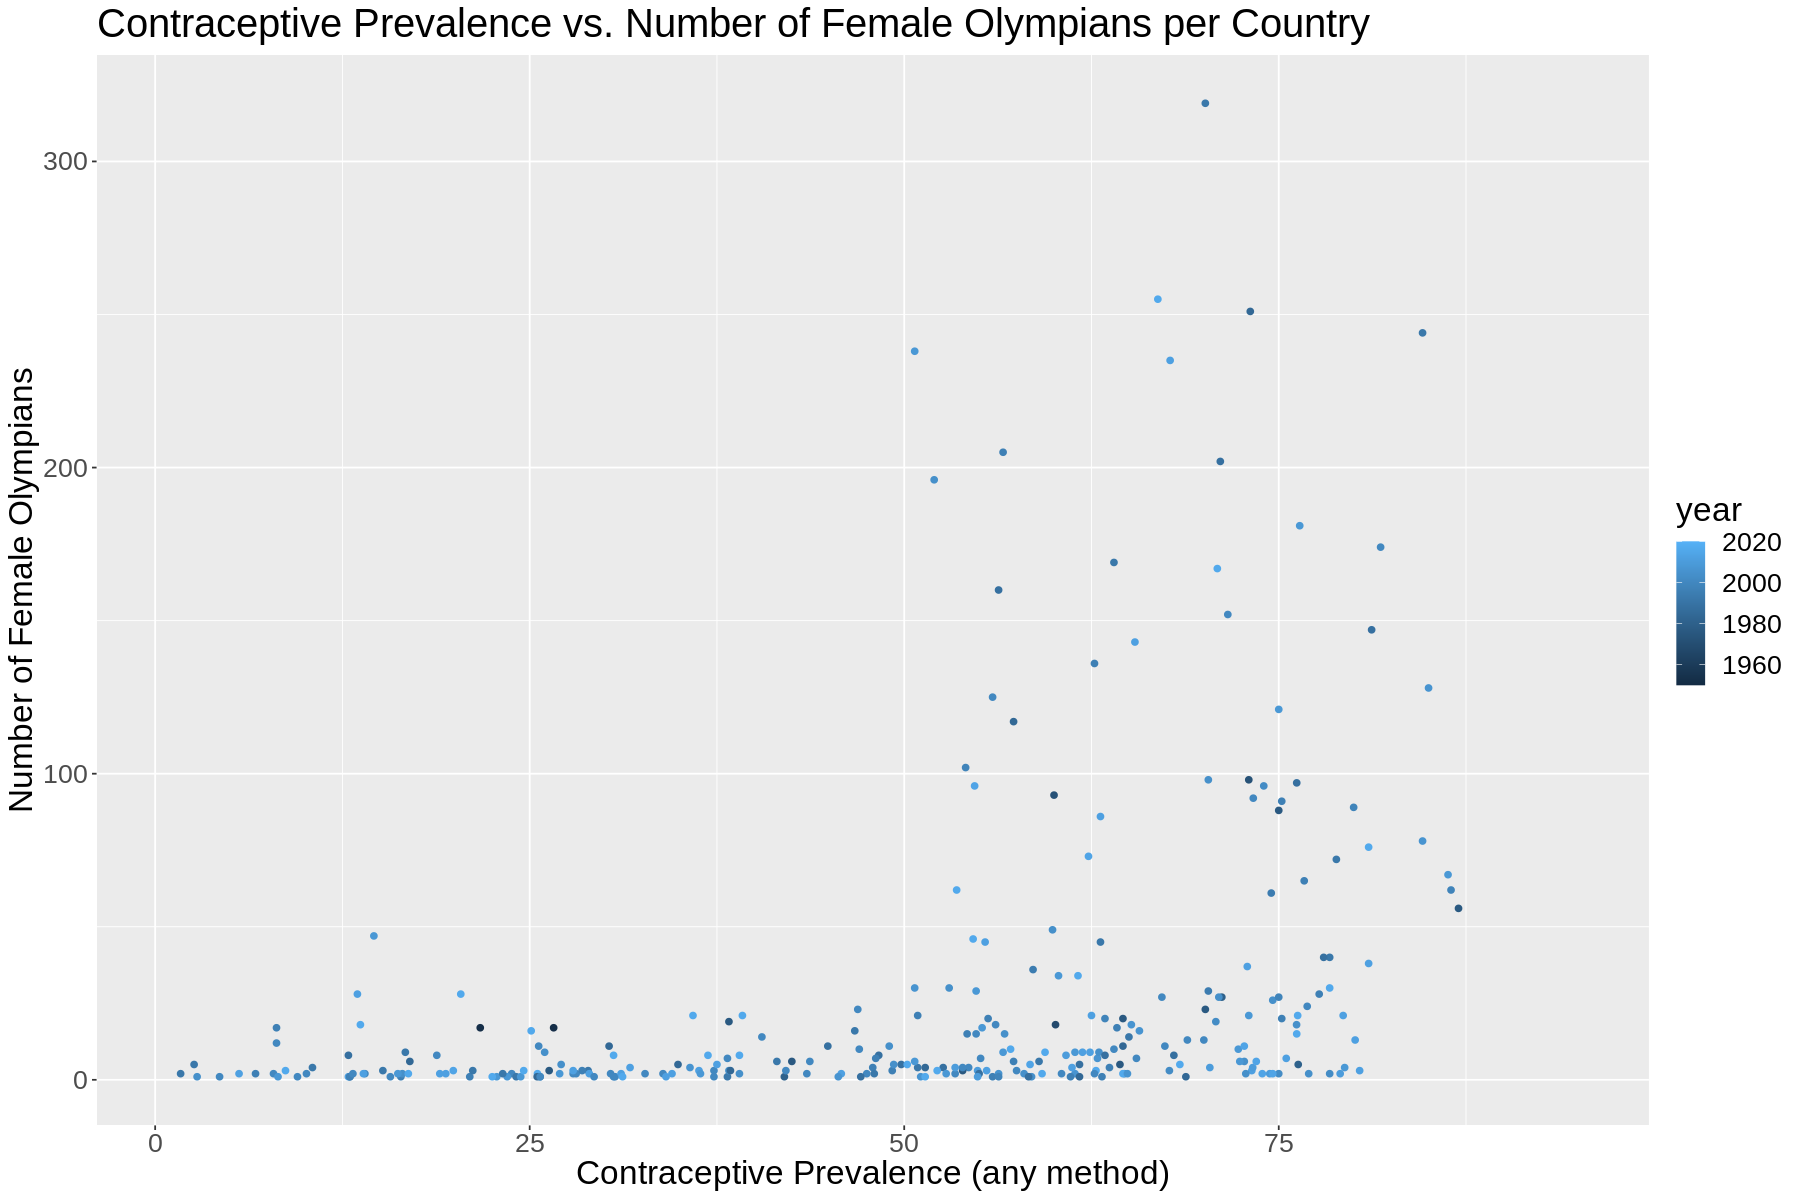

In [16]:
joined_data <- full_join(olympics_by_country, contraceptives_by_country, by = c('Team' = 'country', 'Year' = 'survey_end_year'))

filtered_data <- joined_data %>%
                rename(country = Team, year = Year, n_female_athletes = n) %>%
                filter(!is.na(any_method) & any_method != "..") %>%
                mutate(any_method = as.numeric(any_method))

library(repr)
options(repr.plot.height = 10, repr.plot.width = 15)
n_female_athletes_vs_contraceptive <- ggplot(filtered_data, aes(x = any_method, y = n_female_athletes, color = year)) +
                geom_point() +
                labs(x = "Contraceptive Prevalence (any method)", y = "Number of Female Olympians", 
                     title = "Contraceptive Prevalence vs. Number of Female Olympians per Country") +
                theme(text = element_text(size = 20))
n_female_athletes_vs_contraceptive

**joining, filtering, and plotting contraceptive prevalence vs. % female olympians**

`summarise()` regrouping output by 'Team', 'Year' (override with `.groups` argument)

Warning message:
“Removed 1016 rows containing missing values (geom_point).”


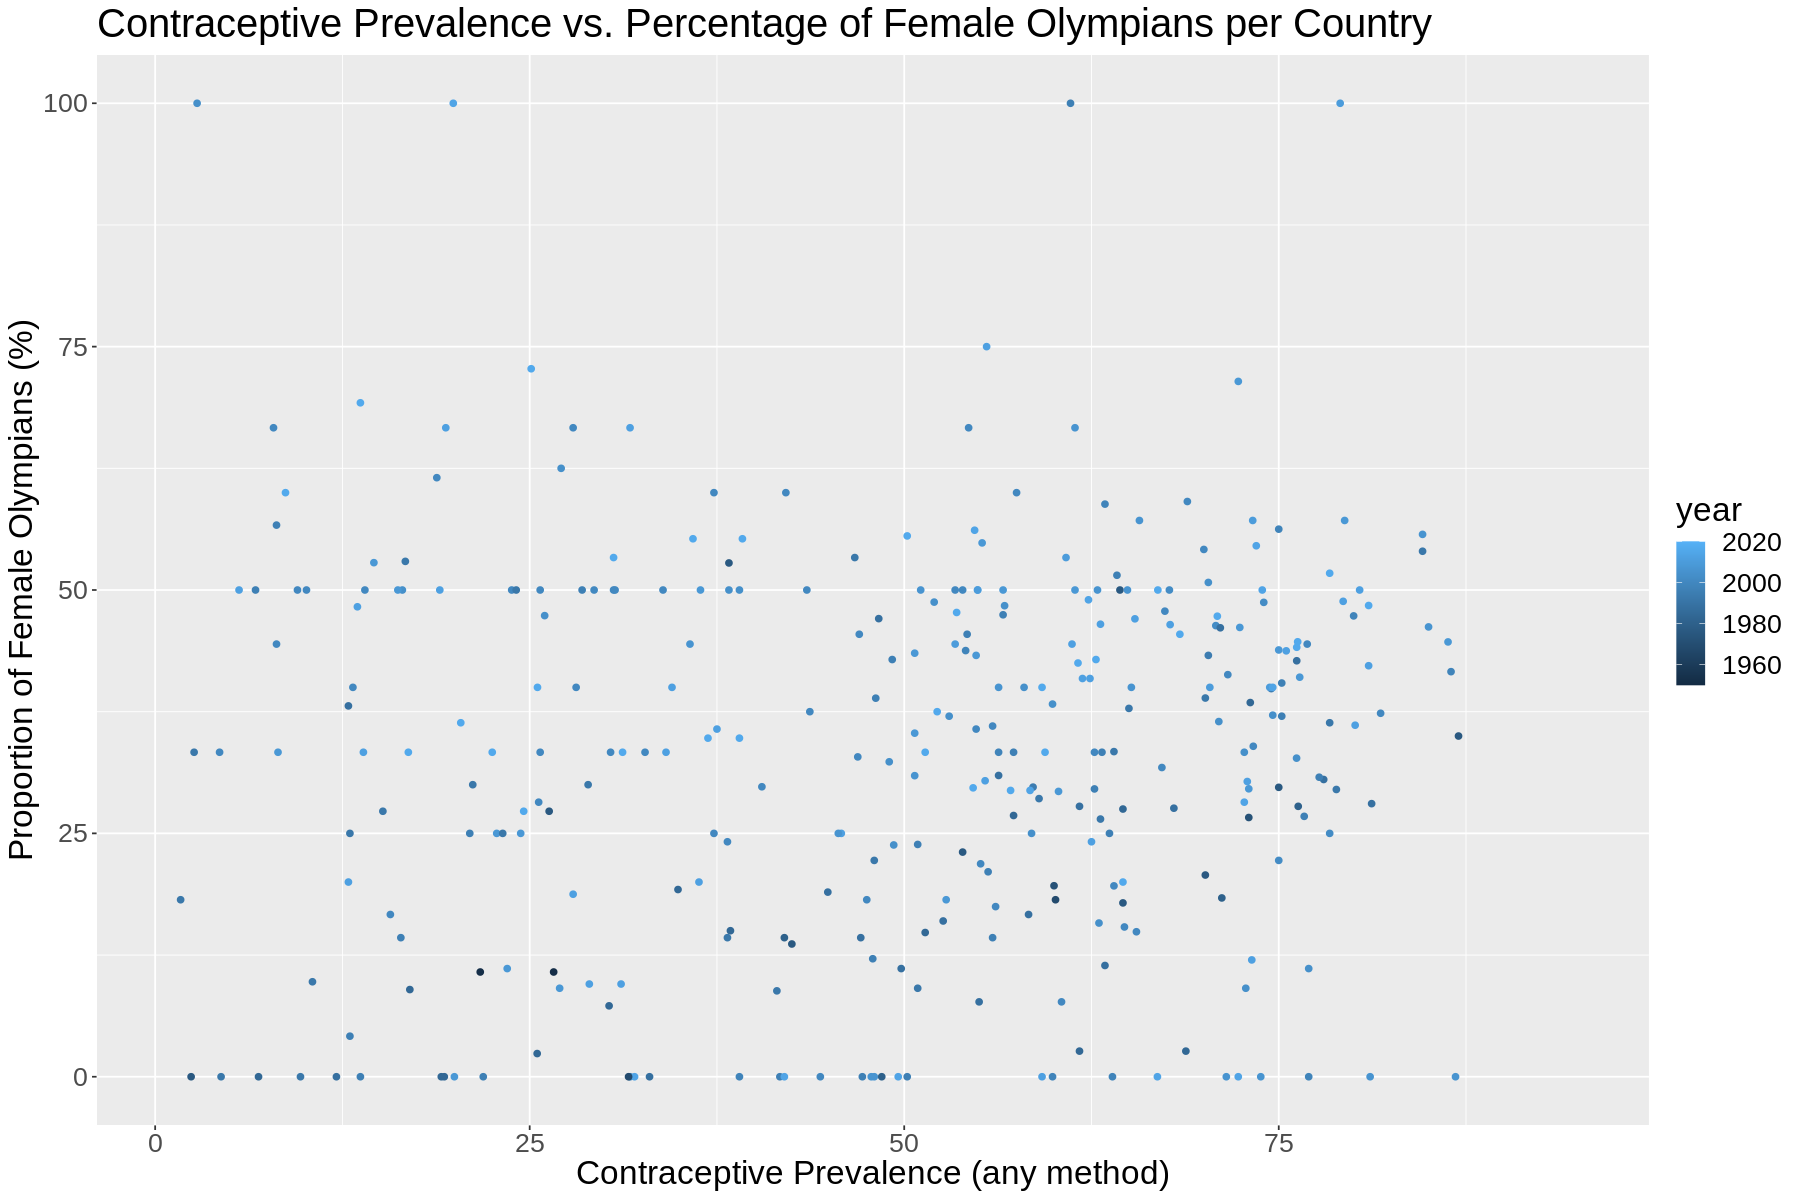

In [20]:
olympics_female_percentage <- olympics %>%
                                filter(Year >= 1950) %>%
                                select(-ID, -Name, -Height, -Weight, -NOC, -Games, -City) %>%
                                group_by(Team, Year, Sex) %>%
                                summarise(n = n()) %>%
                                pivot_wider(names_from = Sex, values_from = n, values_fill = 0) %>%
                                mutate(female_percentage = F/(F + M)*100)

joined_data_percentages <- full_join(olympics_female_percentage, contraceptives_by_country, by = c('Team' = 'country', 'Year' = 'survey_end_year'))

filtered_data_percentages <- joined_data_percentages %>%
                rename(country = Team, year = Year) %>%
                filter(!is.na(any_method) & any_method != "..") %>%
                mutate(any_method = as.numeric(any_method))

percentage_female_athletes_vs_contraceptive <- ggplot(filtered_data_percentages, aes(x = any_method, y = female_percentage, color = year)) +
                geom_point() +
                labs(x = "Contraceptive Prevalence (any method)", y = "Proportion of Female Olympians (%)", 
                     title = "Contraceptive Prevalence vs. Percentage of Female Olympians per Country") +
                theme(text = element_text(size = 20))
percentage_female_athletes_vs_contraceptive

**joining, filtering, and plotting modern contraceptive prevalence vs. % female olympians**

Warning message:
“Removed 1009 rows containing missing values (geom_point).”


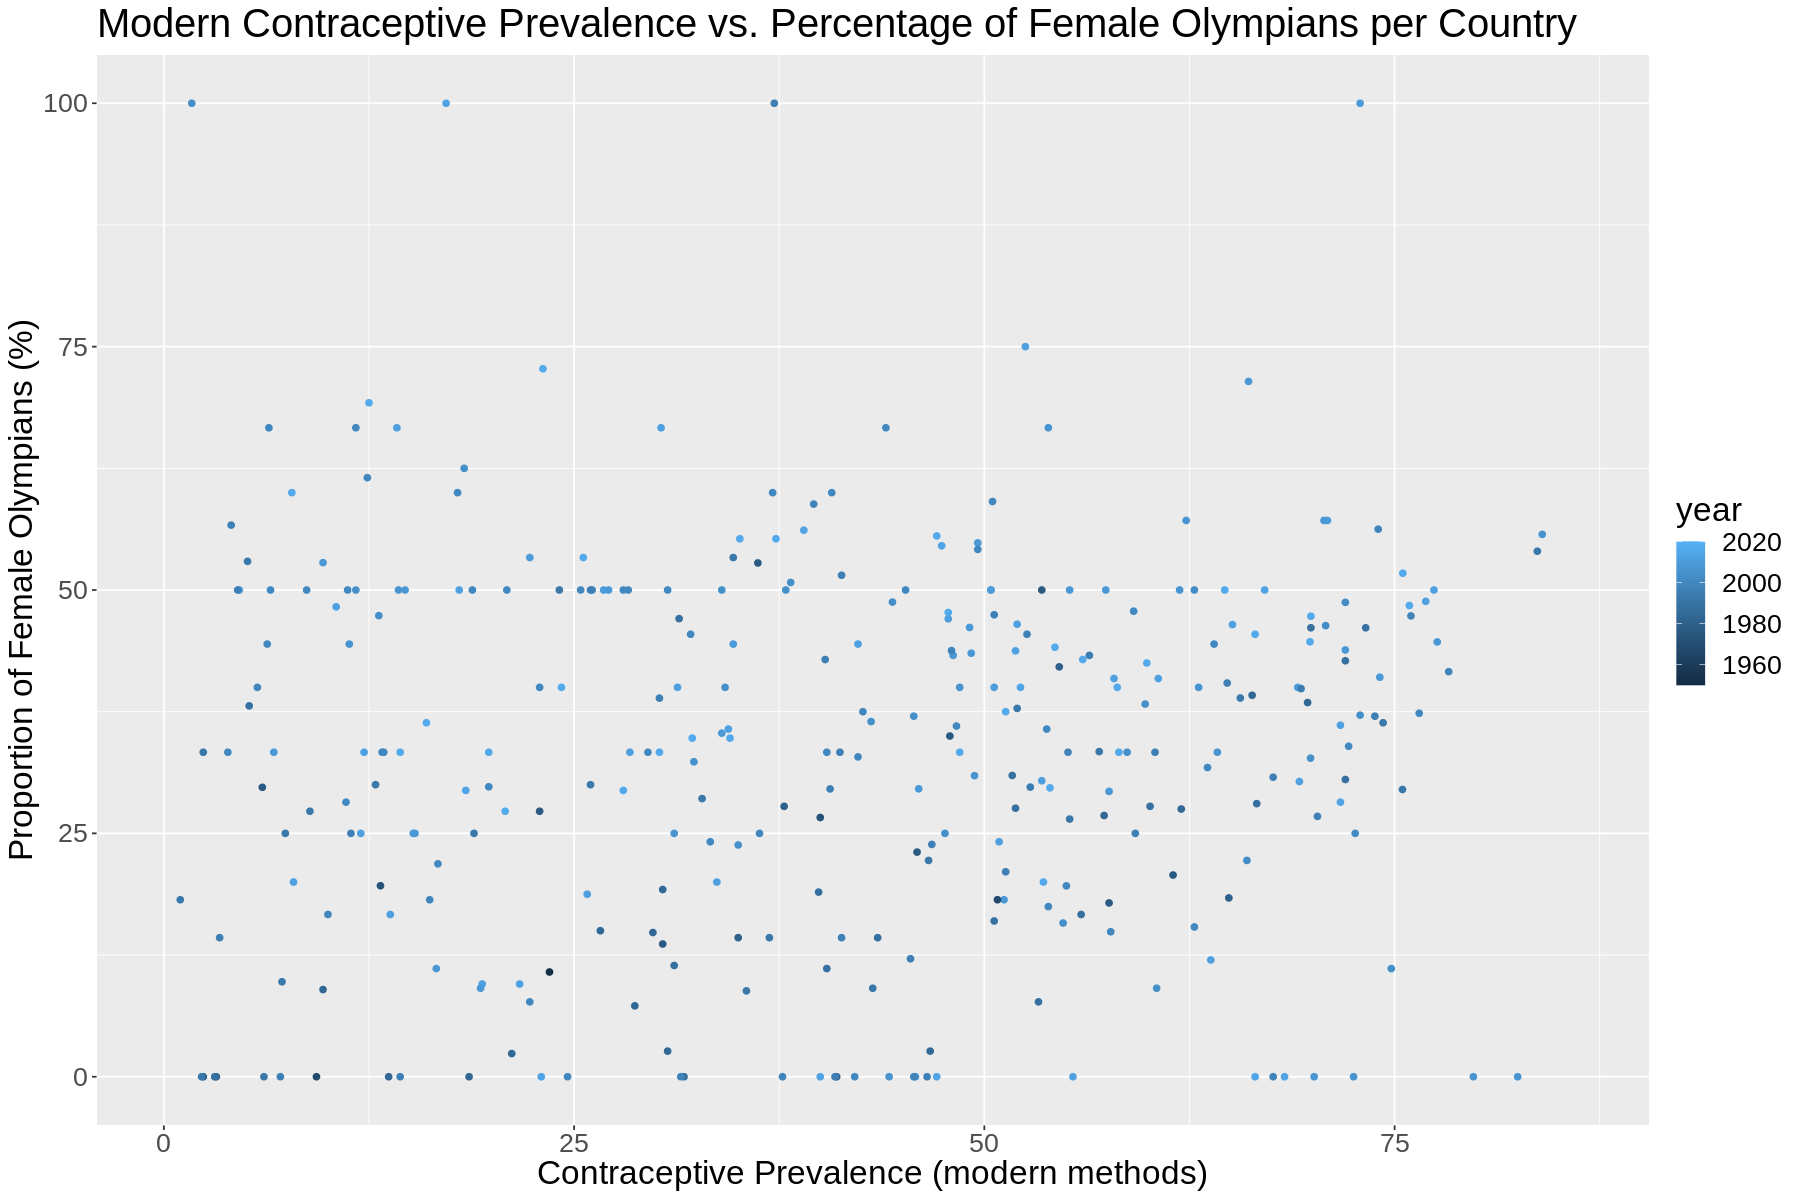

In [19]:
contraceptives_modern <- contraceptives %>%
                                select(country, survey_end_year, any_method_modern)

joined_data_modern <- full_join(olympics_female_percentage, contraceptives_modern, by = c('Team' = 'country', 'Year' = 'survey_end_year'))

filtered_data_modern <- joined_data_modern %>%
                rename(country = Team, year = Year) %>%
                filter(!is.na(any_method_modern) & any_method_modern != "..") %>%
                mutate(any_method_modern = as.numeric(any_method_modern))

percentage_female_athletes_vs_contraceptive_modern <- ggplot(filtered_data_modern, aes(x = any_method_modern, y = female_percentage, color = year)) +
                geom_point() +
                labs(x = "Contraceptive Prevalence (modern methods)", y = "Proportion of Female Olympians (%)", 
                     title = "Modern Contraceptive Prevalence vs. Percentage of Female Olympians per Country") +
                theme(text = element_text(size = 20))
percentage_female_athletes_vs_contraceptive_modern